<a href="https://colab.research.google.com/github/antrks/Data-scientist-2.0-final-task/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_(Data_scientist)_2_0_%D0%A4%D0%B8%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Импорт библиотек

In [241]:
!nvidia-smi

Thu Dec  1 18:35:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0    30W /  70W |    480MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [242]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


#ML
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from tensorflow.keras.losses import mean_absolute_error as mae
from tensorflow.keras.losses import mean_absolute_percentage_error as mape
from tensorflow.keras.losses import  mean_squared_error as mse

#DL
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv1D
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.optimizers import Adam, RMSprop, SGD


from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)


#Подготовка исходных данных

##Загружаем данные из датасета входных и выходных данных

In [244]:
!git clone https://github.com/antrks/Data-scientist-2.0-final-task.git

fatal: destination path 'Data-scientist-2.0-final-task' already exists and is not an empty directory.


In [245]:
path_bp = '/content/Data-scientist-2.0-final-task/datasets2/X_bp.xlsx'
path_nup = '/content/Data-scientist-2.0-final-task/datasets2/X_nup.xlsx'

In [246]:
#Характеристики армирующего компонента
bp = pd.read_excel(path_bp, index_col = 0)
bp.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0.0,1.86,2030.0,738.74,30.00,22.27,100.00,210.0,70.0,3000.0,220.0
1.0,1.86,2030.0,738.74,50.00,23.75,284.62,210.0,70.0,3000.0,220.0
2.0,1.86,2030.0,738.74,49.90,33.00,284.62,210.0,70.0,3000.0,220.0
3.0,1.86,2030.0,738.74,129.00,21.25,300.00,210.0,70.0,3000.0,220.0
4.0,2.77,2030.0,753.00,111.86,22.27,284.62,210.0,70.0,3000.0,220.0


In [247]:
bp.shape

(1023, 10)

In [248]:
#Характеристики связующего компонента
nup = pd.read_excel(path_nup, index_col = 0)
nup.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.0,4.0,57.0
1.0,0.0,4.0,60.0
2.0,0.0,4.0,70.0
3.0,0.0,5.0,47.0
4.0,0.0,5.0,57.0


In [249]:
nup.shape

(1040, 3)

##Обьединение загруженных данных в один датасет

In [250]:
#обьедененый датасет, тип объединения по индексу, тип объединения INNER.
data = bp.join(nup, how='inner')
data.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.86,2030.0,738.74,30.00,22.27,100.00,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1.0,1.86,2030.0,738.74,50.00,23.75,284.62,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2.0,1.86,2030.0,738.74,49.90,33.00,284.62,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3.0,1.86,2030.0,738.74,129.00,21.25,300.00,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4.0,2.77,2030.0,753.00,111.86,22.27,284.62,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


In [251]:
data.shape

(1023, 13)

##Проверка исходных данных на пропуски

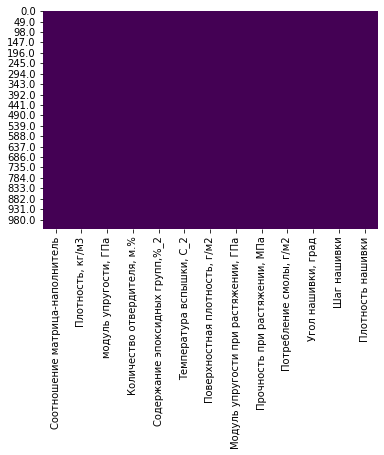

In [252]:
sns.heatmap(data.isna(), cmap = 'viridis', cbar = False)
plt.show()

пропусков не обнаружено

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

все колонки числовые

In [254]:
data.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

##Смортим диапазоны исходных данных

Делая предположение, что кроме столбца 'Угол нашивки, град' с двумя уникальными значениями, данные остальных столбцов подвержены нормальному распределению, оцением графически данные

### Граффик ядерной оценки плотности

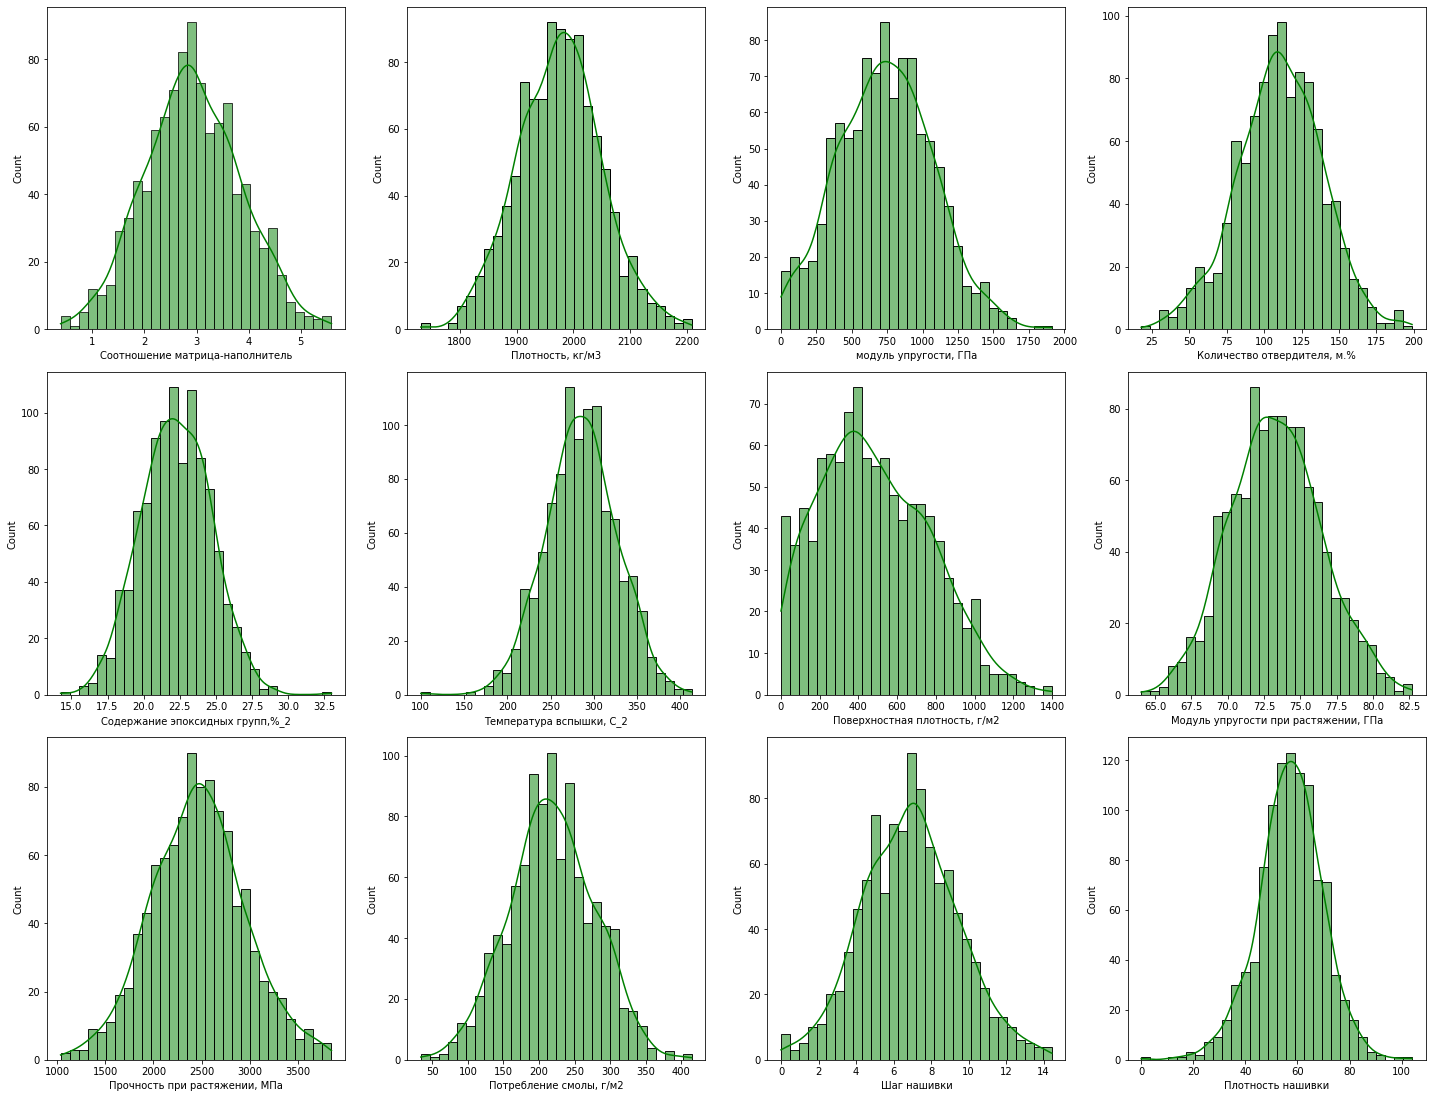

In [255]:
from matplotlib.colorbar import colorbar_factory
def histodraw(data, variables, n_rows, n_cols):
  fig=plt.figure(figsize=(20, 20))
  fig.set_tight_layout(True)
  for i, var_name in enumerate(variables):
    ax=fig.add_subplot(n_rows,n_cols,i+1)
    sns.histplot(data=data, x=var_name, kde=True,bins=30, color = 'green')
    fig.tight_layout()
  plt.show()
histodraw(data, data.loc[:, data.columns!='Угол нашивки, град'].columns, 4, 4)

##Изучаем целевые переменные

###Модуль упругости при растяжении, ГПа

In [256]:
data['Модуль упругости при растяжении, ГПа'].value_counts()

70.00    9
73.33    5
78.00    5
75.00    4
74.04    1
        ..
71.76    1
76.40    1
66.52    1
72.12    1
74.31    1
Name: Модуль упругости при растяжении, ГПа, Length: 1004, dtype: int64

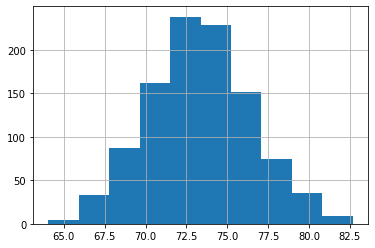

In [257]:
data['Модуль упругости при растяжении, ГПа'].hist()

###Прочность при растяжении, МПа

In [258]:
data['Прочность при растяжении, МПа'].value_counts()

3000.00    9
2455.56    5
2000.00    5
1800.00    4
2071.72    1
          ..
2167.53    1
2300.78    1
2363.62    1
2038.47    1
2856.33    1
Name: Прочность при растяжении, МПа, Length: 1004, dtype: int64

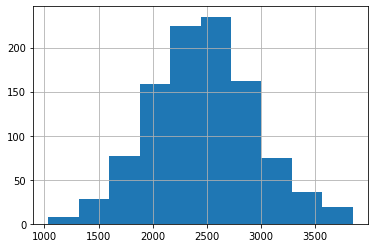

In [259]:
data['Прочность при растяжении, МПа'].hist()

##Кодирование признаков

In [260]:
data['Угол нашивки, град'].value_counts()

0.0     520
90.0    503
Name: Угол нашивки, град, dtype: int64

In [261]:
data['Угол нашивки, град_code'] = data['Угол нашивки, град'].map({0.0 : 0,
                   90.0 : 1})


In [262]:
data['Угол нашивки, град_code'].value_counts()

0    520
1    503
Name: Угол нашивки, град_code, dtype: int64

In [263]:
data.drop(['Угол нашивки, град'], axis = 1, inplace = True)

In [264]:
data['Угол нашивки, град_code'] = data['Угол нашивки, град_code'].astype('float64')

In [265]:
data.shape

(1023, 13)

##Создаем матрицу ошибок


In [266]:
errors_df = pd.DataFrame(columns=['Имя модели','Целевая переменная','MSE','R2'])

#Подготовка выборки

In [267]:
y1 = np.array(data['Модуль упругости при растяжении, ГПа'])
y2 = np.array(data['Прочность при растяжении, МПа'])

X = np.array(data.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis = 1))

In [268]:
print(y1.shape)
print(y2.shape)
print(X.shape)

(1023,)
(1023,)
(1023, 11)


###Масштабируем данные

In [269]:
scaler = MinMaxScaler()
scaler.fit(X) # pkl
X_scaled = scaler.fit_transform(X)

### Ядерная оценка плотности на масштабированных данных

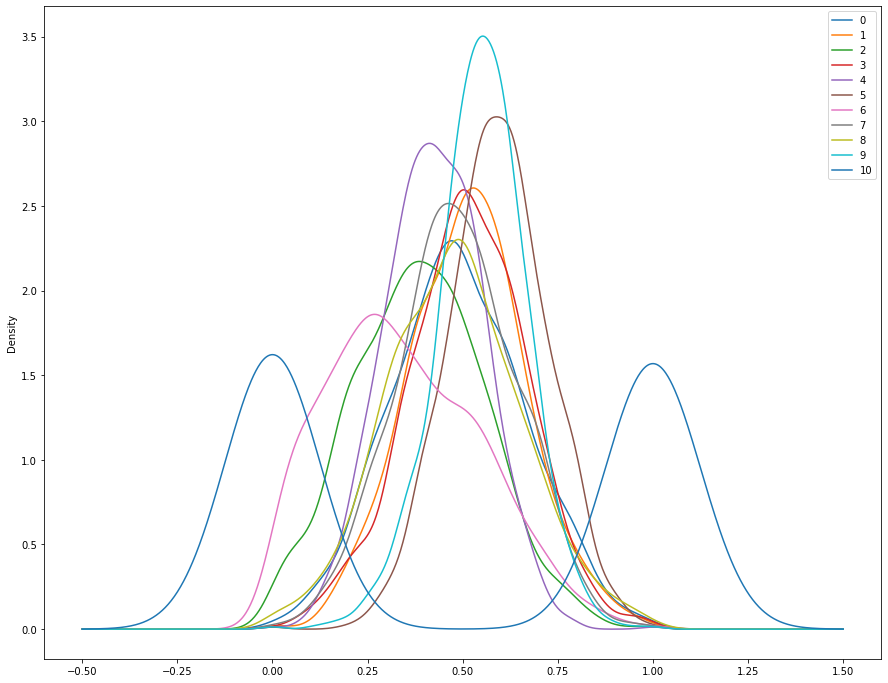

In [270]:
fig, ax = plt.subplots(figsize=(15, 12))
pd.DataFrame(X_scaled).plot(kind='kde', ax=ax)

###Делим на обучающие и тестовые выборки

###'Модуль упругости при растяжении, ГПа'

In [271]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_scaled, y1,
                                                    test_size = 0.2, 
                                                    shuffle = True,
                                                    random_state = 42)

In [272]:
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(818, 11)
(818,)
(205, 11)
(205,)


###'Прочность при растяжении, МПа'

In [273]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_scaled, y2,
                                                    test_size = 0.2, 
                                                    shuffle = True,
                                                    random_state = 42)

In [274]:
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(818, 11)
(818,)
(205, 11)
(205,)


#ML

###Функция отрисовки предсказаных значений

In [275]:
def graf(orig, predict, var, model_name):
  plt.figure(figsize=(17,5))
  plt.title(f'Тестовые и прогнозные значения: {model_name}')
  x_ax = range(len(orig))
  plt.plot(x_ax, orig, lw=0.8, color="red", label="Тестовая выборка")
  plt.scatter(x_ax, predict, s=10, color="blue", label="Прогноз", marker='^')
  plt.legend(loc='best')
  plt.ylabel(var)
  plt.xlabel('Количество наблюдений')
  plt.show()

##Линейная регрессия, Модуль упругости при растяжении, ГПа

In [276]:
lr1 = LinearRegression()
#параметры сетки
param_grid = {'normalize' : [True, False]}
lr_grid1 = GridSearchCV(lr1, 
                       param_grid = param_grid,
                       cv = 5)
#обучаем сетку
lr_grid1.fit(X1_train, y1_train)
print(f'Лучшие параметры : {lr_grid1.best_params_}')
print(f'ЛУчшая точность : {lr_grid1.best_score_}')

Лучшие параметры : {'normalize': True}
ЛУчшая точность : -0.03047357542179623


In [277]:
y1_test[:10] #смотрим целевые данные из тестовой выборки

array([77.18080467, 77.17120942, 73.78982081, 70.94759156, 72.69521848,
       68.70802805, 73.52843767, 73.77260696, 69.18159916, 75.6927677 ])

In [278]:
y1_pred = lr_grid1.predict(X1_test)
y1_pred[:10].round(2)

array([73.69, 73.35, 73.57, 73.92, 73.03, 72.82, 73.27, 73.07, 73.51,
       73.51])

####метрики ошибок

In [279]:
print(mean_absolute_percentage_error(y1_test, y1_pred))
print(mean_squared_error(y1_test, y1_pred))
print(mean_absolute_error(y1_test, y1_pred))

0.033433911255705655
9.389353867977485
2.4570126521995137


In [280]:
MSE = mean_squared_error(y1_test, y1_pred)
R2 = r2_score(y1_test, y1_pred)
lr_grid1_errors = pd.DataFrame({'Имя модели':'lr_grid',
                                'Целевая переменная':'Модуль упругости при растяжении, ГПа',
                                'MSE':[MSE],
                               'R2':R2})
errors_df =pd.concat([errors_df, lr_grid1_errors])

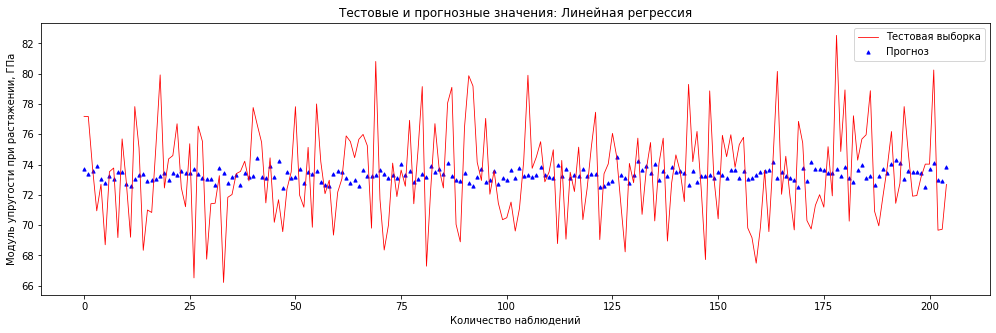

In [281]:
graf(y1_test,y1_pred, 'Модуль упругости при растяжении, ГПа','Линейная регрессия')

##Линейная регрессия, Прочность при растяжении, МПа

In [282]:
lr2 = LinearRegression()
#параметры сетки
param_grid = {'normalize' : [True, False]}
lr_grid2 = GridSearchCV(lr2, 
                       param_grid = param_grid,
                       cv = 5)
#обучаем сетку
lr_grid2.fit(X2_train, y2_train)
print(f'Лучшие параметры : {lr_grid2.best_params_}')
print(f'ЛУчшая точность : {lr_grid2.best_score_}')

Лучшие параметры : {'normalize': False}
ЛУчшая точность : -0.016719741299397482


In [283]:
y2_test[:10] #смотрим целевые данные из тестовой выборки

array([2572.15578641, 2414.50736246, 2219.14260497, 2796.78540176,
       2734.0304469 , 2379.63494596, 2475.1140827 , 1264.31068218,
       2757.13030349, 3052.72692032])

In [284]:
y2_pred = lr_grid2.predict(X2_test)
y2_pred[:10].round(2)

array([2497.59, 2470.44, 2465.67, 2519.86, 2511.9 , 2396.16, 2440.63,
       2491.32, 2443.33, 2498.64])

####метрики ошибок

In [285]:
print(mean_absolute_percentage_error(y2_test, y2_pred))
print(mean_squared_error(y2_test, y2_pred))
print(mean_absolute_error(y2_test, y2_pred))

0.15979705032411978
214561.1317709568
363.55474768882664


In [286]:
MSE = mean_squared_error(y2_test, y2_pred)
R2 = r2_score(y2_test, y2_pred)
lr_grid2_errors = pd.DataFrame({'Имя модели':'lr_grid',
                                'Целевая переменная':'Прочность при растяжении, МПа',
                                'MSE':[MSE],
                               'R2':R2})
errors_df =pd.concat([errors_df, lr_grid2_errors])

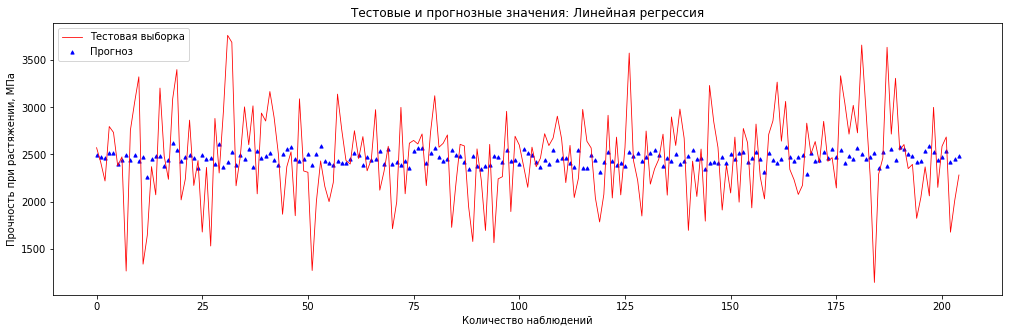

In [287]:
graf(y2_test,y2_pred, 'Прочность при растяжении, МПа','Линейная регрессия')

##Метод ближайших соседей, Модуль упругости при растяжении, ГПа

In [288]:
kNNr1 = KNeighborsRegressor()
#параметры сетки
param_grid = {'n_neighbors' : [4, 6, 10 , 13]}
kNNr_grid1 = GridSearchCV(kNNr1, 
                       param_grid = param_grid,
                       cv = 5)
#обучаем сетку
kNNr_grid1.fit(X1_train, y1_train)
print(f'Лучшие параметры : {kNNr_grid1.best_params_}')
print(f'ЛУчшая точность : {kNNr_grid1.best_score_}')

Лучшие параметры : {'n_neighbors': 13}
ЛУчшая точность : -0.08403008890900736


In [289]:
y1_test[:10] #смотрим целевые данные из тестовой выборки

array([77.18080467, 77.17120942, 73.78982081, 70.94759156, 72.69521848,
       68.70802805, 73.52843767, 73.77260696, 69.18159916, 75.6927677 ])

In [290]:
y1_pred = kNNr_grid1.predict(X1_test)
y1_pred[:10].round(2)

array([73.31, 73.27, 72.65, 74.57, 72.36, 73.67, 73.21, 73.91, 72.94,
       73.93])

####метрики ошибок

In [291]:
print(mean_absolute_percentage_error(y1_test, y1_pred))
print(mean_squared_error(y1_test, y1_pred))
print(mean_absolute_error(y1_test, y1_pred))

0.03592313860663376
10.730874572941312
2.635229514604943


In [292]:
MSE = mean_squared_error(y1_test, y1_pred)
R2 = r2_score(y1_test, y1_pred)
kNNr_grid1_errors = pd.DataFrame({'Имя модели':'kNNr_grid',
                                'Целевая переменная':'Модуль упругости при растяжении, ГПа',
                                'MSE':[MSE],
                               'R2':R2})
errors_df = pd.concat([errors_df, kNNr_grid1_errors])

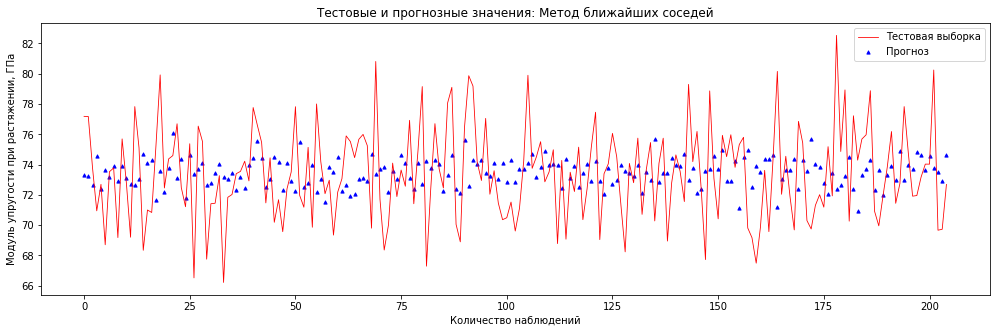

In [293]:
graf(y1_test,y1_pred, 'Модуль упругости при растяжении, ГПа','Метод ближайших соседей')

##Метод ближайших соседей, Прочность при растяжении, МПа

In [294]:
kNNr2 = KNeighborsRegressor()
#параметры сетки
param_grid = {'n_neighbors' : [4, 6, 10 , 13]}
kNNr_grid2 = GridSearchCV(kNNr2, 
                       param_grid = param_grid,
                       cv = 5)
#обучаем сетку
kNNr_grid2.fit(X2_train, y2_train)
print(f'Лучшие параметры : {kNNr_grid2.best_params_}')
print(f'ЛУчшая точность : {kNNr_grid2.best_score_}')

Лучшие параметры : {'n_neighbors': 13}
ЛУчшая точность : -0.057782393189323676


In [295]:
y2_test[:10] #смотрим целевые данные из тестовой выборки

array([2572.15578641, 2414.50736246, 2219.14260497, 2796.78540176,
       2734.0304469 , 2379.63494596, 2475.1140827 , 1264.31068218,
       2757.13030349, 3052.72692032])

In [296]:
y2_pred = kNNr_grid2.predict(X2_test)
y2_pred[:10].round(2)

array([2394.12, 2432.89, 2373.54, 2758.53, 2310.66, 2447.88, 2386.25,
       2598.85, 2453.11, 2450.17])

####метрики ошибок

In [297]:
print(mean_absolute_percentage_error(y2_test, y2_pred))
print(mean_squared_error(y2_test, y2_pred))
print(mean_absolute_error(y2_test, y2_pred))

0.1676903637031351
235115.54886518454
381.3264992667034


In [298]:
MSE = mean_squared_error(y2_test, y2_pred)
R2 = r2_score(y2_test, y2_pred)
kNNr_grid2_errors = pd.DataFrame({'Имя модели':'kNNr_grid',
                                'Целевая переменная':'Прочность при растяжении, МПа',
                                'MSE':[MSE],
                               'R2':R2})
errors_df = pd.concat([errors_df, kNNr_grid2_errors])

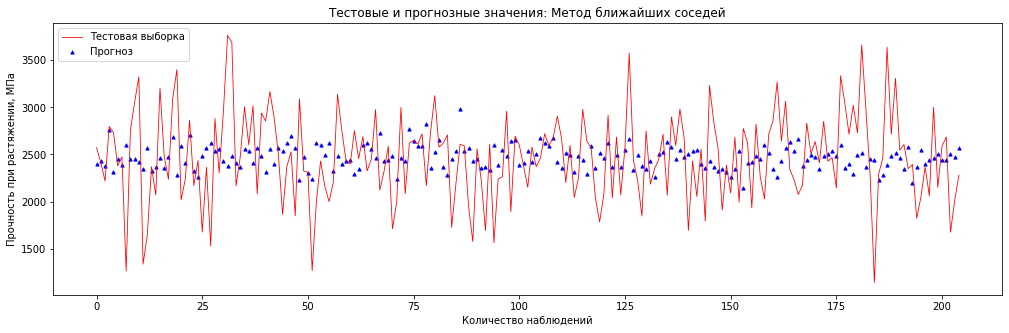

In [299]:
graf(y2_test, y2_pred, 'Прочность при растяжении, МПа','Метод ближайших соседей')

##Градиентный бустинг, Модуль упругости при растяжении, ГПа

In [300]:

gbr1 = GradientBoostingRegressor()

#параметры сетки
param_grid = {'n_estimators' : [4, 5, 6],
              'max_depth' : [10, 20],
              'learning_rate' : [0.01],
              'min_samples_split' : [5, 7]}
#инциализация сетки
gbr_grid1 = GridSearchCV(gbr1,
                         param_grid = param_grid,
                         cv = 5)
#обучение
gbr_grid1.fit(X1_train, y1_train)
#лучшие параметры
print(f'Лучшие параметры : {gbr_grid1.best_params_}')
print(f'ЛУчшая точность : {gbr_grid1.best_score_}')

Лучшие параметры : {'learning_rate': 0.01, 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 6}
ЛУчшая точность : -0.013764629117293148


In [301]:
y1_test[:10] #смотрим целевые данные из тестовой выборки

array([77.18080467, 77.17120942, 73.78982081, 70.94759156, 72.69521848,
       68.70802805, 73.52843767, 73.77260696, 69.18159916, 75.6927677 ])

In [302]:
y1_pred = gbr_grid1.predict(X1_test)
y1_pred[:10].round(2)

array([72.97, 73.09, 73.43, 73.4 , 73.18, 73.35, 73.64, 73.38, 73.55,
       73.13])

####метрики ошибок

In [303]:
print(mean_absolute_percentage_error(y1_test, y1_pred))
print(mean_squared_error(y1_test, y1_pred))
print(mean_absolute_error(y1_test, y1_pred))

0.03369923394447743
9.502175631557012
2.4766392879849906


In [304]:
MSE = mean_squared_error(y1_test, y1_pred)
R2 = r2_score(y1_test, y1_pred)
gbr_grid1_errors = pd.DataFrame({'Имя модели':'gbr_grid',
                                'Целевая переменная':'Модуль упругости при растяжении, ГПа',
                                'MSE':[MSE],
                               'R2':R2})
errors_df =pd.concat([errors_df, gbr_grid1_errors])

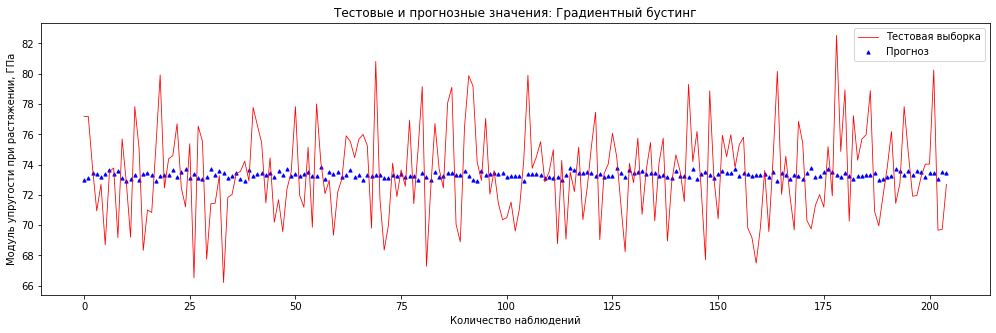

In [305]:
graf(y1_test, y1_pred, 'Модуль упругости при растяжении, ГПа','Градиентный бустинг')

##Градиентный бустинг, Прочность при растяжении, МПа

In [306]:
gbr2 = GradientBoostingRegressor()

#параметры сетки
param_grid = {'n_estimators' : [4, 5, 6],
              'max_depth' : [10, 20],
              'learning_rate' : [0.01]}
#инциализация сетки
gbr_grid2 = GridSearchCV(gbr2,
                         param_grid = param_grid,
                         cv = 5)
#обучение
gbr_grid2.fit(X2_train, y2_train)
#лучшие параметры
print(f'Лучшие параметры : {gbr_grid2.best_params_}')
print(f'ЛУчшая точность : {gbr_grid2.best_score_}')

Лучшие параметры : {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 6}
ЛУчшая точность : 0.0027108213392537327


In [307]:
y2_test[:10] #смотрим целевые данные из тестовой выборки

array([2572.15578641, 2414.50736246, 2219.14260497, 2796.78540176,
       2734.0304469 , 2379.63494596, 2475.1140827 , 1264.31068218,
       2757.13030349, 3052.72692032])

In [308]:
y2_pred = gbr_grid2.predict(X2_test)
y2_pred[:10].round(2)

array([2452.66, 2463.46, 2460.74, 2466.95, 2443.14, 2463.41, 2498.26,
       2466.13, 2453.32, 2459.43])

####метрики ошибок

In [309]:
print(mean_absolute_percentage_error(y2_test, y2_pred))
print(mean_squared_error(y2_test, y2_pred))
print(mean_absolute_error(y2_test, y2_pred))

0.16164187772667246
218540.03685615244
366.491832361121


In [310]:
MSE = mean_squared_error(y2_test, y2_pred)
R2 = r2_score(y2_test, y2_pred)
gbr_grid2_errors = pd.DataFrame({'Имя модели':'gbr_grid',
                                'Целевая переменная':'Прочность при растяжении, МПа',
                                'MSE':[MSE],
                               'R2':R2})
errors_df =pd.concat([errors_df, gbr_grid2_errors])

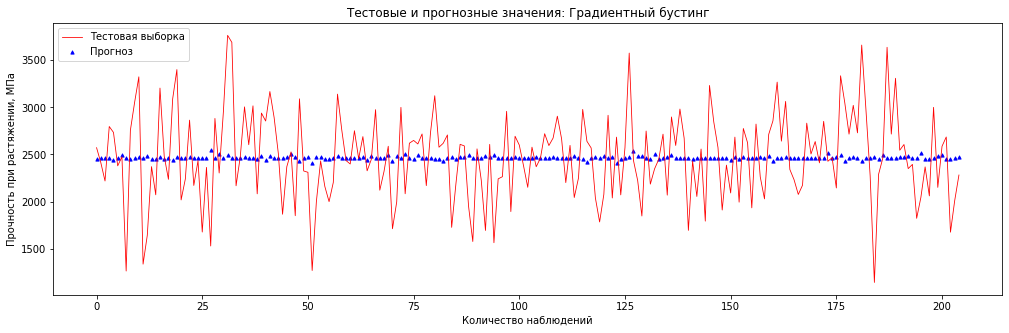

In [311]:
graf(y2_test,y2_pred, 'Прочность при растяжении, МПа','Градиентный бустинг')

## Алгоритмы нейронной сети, Модуль упругости при растяжении, ГПа

In [312]:
#оборачиваем архитектуру в функцию
def get_model1(learning_rate,  #0.001
              neurons_1_layer, #20
              activation_1_layer, #'relu'
              neurons_2_layer, #10
              activation_2_layer, #'relu'
              losses):
  model = Sequential()
  model.add(Dense(neurons_1_layer, input_shape = (X1_train.shape[1], ) , activation = activation_1_layer))
  model.add(Dense(neurons_2_layer, activation = activation_2_layer))
  model.add(Dense(1, activation = 'linear'))
  #early stop
  
  #компилируем модель
  model.compile(loss = losses, 
                optimizer = Adam(learning_rate), 
                metrics = losses)
  
  return model

In [313]:
my_model1 = KerasRegressor(model = get_model1,  
                           learning_rate = 0.01,
                           neurons_1_layer = 20,
                           activation_1_layer = 'relu',
                           neurons_2_layer = 10,
                           activation_2_layer = 'relu',
                           losses = mae,
                           verbose = 0
                           )

In [314]:

param_grid = {              
              'learning_rate' : [0.01], 
              'neurons_1_layer' : [50], 
              'activation_1_layer' : ['elu'], 
              'neurons_2_layer' : [50], 
              'activation_2_layer' : ['elu'], 
              'losses' : [mape, mae, mse]}

nn_grid1 = GridSearchCV(estimator = my_model1,
                       param_grid = param_grid,
                       cv = 3)

grid_result1 = nn_grid1.fit(X1_train, y1_train)

#средняя ошибка
means = grid_result1.cv_results_['mean_test_score']
params = grid_result1.cv_results_['params']

for mean, param in zip(means, params):
  print(f"средняя точность в сетке = {mean},  при параметрах :{param}")

средняя точность в сетке = -11.656647532670126,  при параметрах :{'activation_1_layer': 'elu', 'activation_2_layer': 'elu', 'learning_rate': 0.01, 'losses': <function mean_absolute_percentage_error at 0x7fe702f90200>, 'neurons_1_layer': 50, 'neurons_2_layer': 50}
средняя точность в сетке = -19.686064587559272,  при параметрах :{'activation_1_layer': 'elu', 'activation_2_layer': 'elu', 'learning_rate': 0.01, 'losses': <function mean_absolute_error at 0x7fe702f87f80>, 'neurons_1_layer': 50, 'neurons_2_layer': 50}
средняя точность в сетке = -7.285483937547785,  при параметрах :{'activation_1_layer': 'elu', 'activation_2_layer': 'elu', 'learning_rate': 0.01, 'losses': <function mean_squared_error at 0x7fe702f87cb0>, 'neurons_1_layer': 50, 'neurons_2_layer': 50}


In [315]:
grid_result1.best_params_

{'activation_1_layer': 'elu',
 'activation_2_layer': 'elu',
 'learning_rate': 0.01,
 'losses': <function keras.losses.mean_squared_error(y_true, y_pred)>,
 'neurons_1_layer': 50,
 'neurons_2_layer': 50}

In [316]:
nn_1 = get_model1(**grid_result1.best_params_)
history1 = nn_1.fit(X1_train, 
                    y1_train,
                    batch_size = 200,
                    epochs = 20,
                    validation_split = 0.2,
                    verbose = 0)


In [317]:
y1_test[:10]

array([77.18080467, 77.17120942, 73.78982081, 70.94759156, 72.69521848,
       68.70802805, 73.52843767, 73.77260696, 69.18159916, 75.6927677 ])

In [318]:
y1_pred = nn_1.predict(X1_test)
y1_pred[:10].round(2)

7/7 [==============================] - 0s 5ms/step


array([[70.01],
       [70.28],
       [66.89],
       [73.64],
       [68.59],
       [77.05],
       [74.64],
       [76.11],
       [72.9 ],
       [76.92]], dtype=float32)

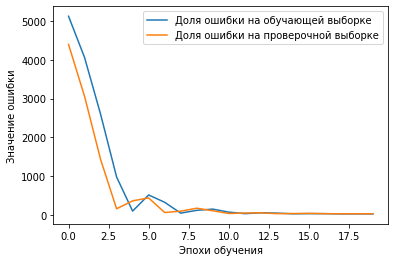

In [319]:
plt.plot(history1.history['loss'],
         label = 'Доля ошибки на обучающей выборке')
plt.plot(history1.history['val_loss'],
         label = 'Доля ошибки на проверочной выборке')
plt.xlabel('Эпохи обучения')
plt.ylabel('Значение ошибки')
plt.legend(loc='best')
plt.show()

####метрики ошибок 

In [320]:
print(mean_absolute_percentage_error(y1_test, y1_pred))
print(mean_squared_error(y1_test, y1_pred))
print(mean_absolute_error(y1_test, y1_pred))

0.0590705146505957
30.137752685985692
4.320469811079459


In [321]:
MSE = mean_squared_error(y1_test, y1_pred)
R2 = r2_score(y1_test, y1_pred)
dp_model_errors = pd.DataFrame({'Имя модели':'nn_grid',
                                'Целевая переменная':'Модуль упругости при растяжении, ГПа',
                                'MSE':[MSE],
                               'R2':R2})
errors_df =pd.concat([errors_df, dp_model_errors])

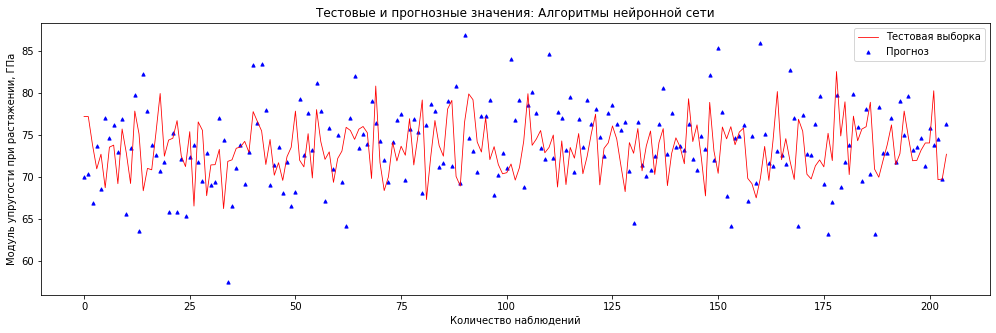

In [322]:
graf(y1_test, y1_pred, 'Модуль упругости при растяжении, ГПа','Алгоритмы нейронной сети')

## Алгоритмы нейронной сети, Прочность при растяжении, МПа

In [323]:

#оборачиваем архитектуру в функцию
def get_model2(learning_rate,  #0.001
              neurons_1_layer, #20
              activation_1_layer, #'relu'
              neurons_2_layer, #10
              activation_2_layer, #'relu'
              losses):
  model = Sequential()
  model.add(Dense(neurons_1_layer, input_shape = (X2_train.shape[1], ) , activation = activation_1_layer))
  model.add(Dense(neurons_2_layer, activation = activation_2_layer))
  model.add(Dense(1, activation = 'linear'))
  #early stop
  
  #компилируем модель
  model.compile(loss = losses, 
                optimizer = Adam(learning_rate), 
                metrics = losses)
  
  return model

In [324]:
my_model2 = KerasRegressor(model = get_model2,  
                           learning_rate = 0.01,
                           neurons_1_layer = 20,
                           activation_1_layer = 'relu',
                           neurons_2_layer = 10,
                           activation_2_layer = 'relu',
                           losses = mae,
                           verbose = 0,
                           batch_size = 50,
                           epochs = 10
                           )

In [325]:
#задаём параметры сетки
param_grid = { 
               
              'learning_rate' : [0.01, 0.1], 
              'neurons_1_layer' : [20], 
              'activation_1_layer' : ['elu', 'relu'], 
              'neurons_2_layer' : [10], 
              'activation_2_layer' : ['linear'], 
              'losses' : [mape, mae, mse]}

#создаем сетку
nn_grid2 = GridSearchCV(estimator = my_model2,
                       param_grid = param_grid,

                       cv = 3)

#обучаем сетку
grid_result2 = nn_grid2.fit(X2_train, y2_train)

#средняя ошибка
means = grid_result2.cv_results_['mean_test_score']
params = grid_result2.cv_results_['params']

for mean, param in zip(means, params):

  print(f"средняя точность в сетке = {mean},  при параметрах :{param}")

средняя точность в сетке = -0.30274196572879813,  при параметрах :{'activation_1_layer': 'elu', 'activation_2_layer': 'linear', 'learning_rate': 0.01, 'losses': <function mean_absolute_percentage_error at 0x7fe702f90200>, 'neurons_1_layer': 20, 'neurons_2_layer': 10}
средняя точность в сетке = -0.5179084106448733,  при параметрах :{'activation_1_layer': 'elu', 'activation_2_layer': 'linear', 'learning_rate': 0.01, 'losses': <function mean_absolute_error at 0x7fe702f87f80>, 'neurons_1_layer': 20, 'neurons_2_layer': 10}
средняя точность в сетке = -0.5500632494578435,  при параметрах :{'activation_1_layer': 'elu', 'activation_2_layer': 'linear', 'learning_rate': 0.01, 'losses': <function mean_squared_error at 0x7fe702f87cb0>, 'neurons_1_layer': 20, 'neurons_2_layer': 10}
средняя точность в сетке = -0.3668299119848329,  при параметрах :{'activation_1_layer': 'elu', 'activation_2_layer': 'linear', 'learning_rate': 0.1, 'losses': <function mean_absolute_percentage_error at 0x7fe702f90200>, '

In [326]:

nn_2 = get_model2(**grid_result2.best_params_)
history2 = nn_2.fit(X2_train, 
                    y2_train,
                    batch_size = 200,
                    epochs = 20,
                    validation_split = 0.2,
                    verbose = 0)


In [327]:
y2_test[:10]

array([2572.15578641, 2414.50736246, 2219.14260497, 2796.78540176,
       2734.0304469 , 2379.63494596, 2475.1140827 , 1264.31068218,
       2757.13030349, 3052.72692032])

In [328]:
y2_pred = nn_2.predict(X2_test)
y2_pred[:10].round(2)

7/7 [==============================] - 0s 2ms/step


array([[2349.11],
       [2360.63],
       [2195.86],
       [2458.63],
       [2271.6 ],
       [2609.75],
       [2538.66],
       [2581.22],
       [2400.42],
       [2563.36]], dtype=float32)

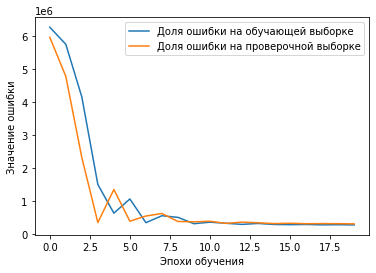

In [329]:
plt.plot(history2.history['loss'],
         label = 'Доля ошибки на обучающей выборке')
plt.plot(history2.history['val_loss'],
         label = 'Доля ошибки на проверочной выборке')
plt.xlabel('Эпохи обучения')
plt.ylabel('Значение ошибки')
plt.legend(loc='best')
plt.show()

####метрики ошибок

In [330]:
print(mean_absolute_percentage_error(y2_test, y2_pred))
print(mean_squared_error(y2_test, y2_pred))
print(mean_absolute_error(y2_test, y2_pred))

0.17669802867188705
271408.6079881464
403.1248274479055


In [331]:
MSE = mean_squared_error(y2_test, y2_pred)
R2 = r2_score(y2_test, y2_pred)
dp_model_errors = pd.DataFrame({'Имя модели':'nn_grid',
                                'Целевая переменная':'Прочность при растяжении, МПа',
                                'MSE':[MSE],
                               'R2':R2})
errors_df = pd.concat([errors_df, dp_model_errors])

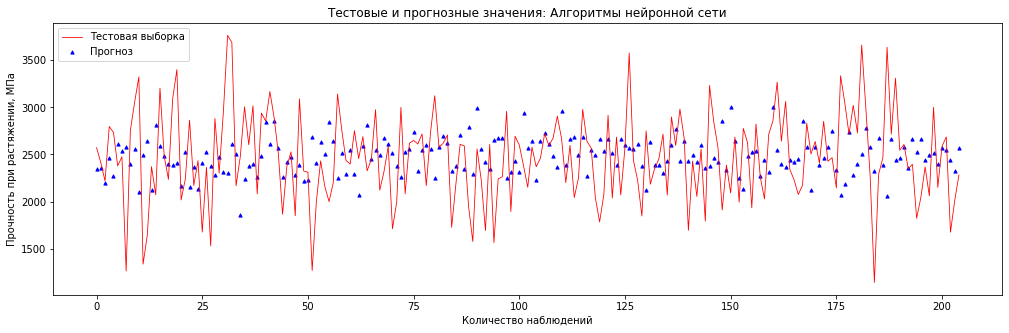

In [332]:
graf(y2_test, y2_pred, 'Прочность при растяжении, МПа','Алгоритмы нейронной сети')

##Итоговая матрица ошибок

In [333]:
pd.set_option("precision", 2)
errors_df

,Имя модели,Целевая переменная,MSE,R2
0,lr_grid,"Модуль упругости при растяжении, ГПа",9.39,-2.02e-03
0,lr_grid,"Прочность при растяжении, МПа",214561.13,1.10e-02
0,kNNr_grid,"Модуль упругости при растяжении, ГПа",10.73,-1.45e-01
0,kNNr_grid,"Прочность при растяжении, МПа",235115.55,-8.37e-02
0,gbr_grid,"Модуль упругости при растяжении, ГПа",9.50,-1.41e-02
0,gbr_grid,"Прочность при растяжении, МПа",218540.04,-7.33e-03
0,nn_grid,"Модуль упругости при растяжении, ГПа",30.14,-2.22e+00
0,nn_grid,"Прочность при растяжении, МПа",271408.61,-2.51e-01
